### Stock Prediction using fb Prophet

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with yearly, weekly, and daily seasonality, plus holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from fbprophet import Prophet

os.chdir(r'N:\STOCK ADVISOR BOT')

Importing plotly failed. Interactive plots will not work.


In [2]:
ALPHA_VANTAGE_API_KEY = 'XAGC5LBB1SI9RDLW'
ts = TimeSeries(key= ALPHA_VANTAGE_API_KEY, output_format='pandas')
df_Stock, Stock_info = ts.get_daily('MSFT', outputsize='full') 

df_Stock = df_Stock.rename(columns={'1. open' : 'Open', '2. high': 'High', '3. low':'Low', '4. close': 'Close', '5. volume': 'Volume' })
df_Stock = df_Stock.rename_axis(['Date'])

Stock = df_Stock.sort_index(ascending=True, axis=0)
#slicing the data for 15 years from '2004-01-02' to today
Stock = Stock.loc['2004-01-02':]
Stock

,Open,High,Low,Close,Volume
Date,,,,,
2004-01-02,27.5800,27.77,27.33,27.45,44487700.0
2004-01-05,27.7300,28.18,27.72,28.14,67333700.0
2004-01-06,28.1900,28.28,28.07,28.24,46950800.0
2004-01-07,28.1700,28.31,28.01,28.21,54298200.0
2004-01-08,28.3900,28.48,28.00,28.16,58810800.0
...,...,...,...,...,...
2020-04-03,155.1000,157.38,152.19,153.83,41243284.0
2020-04-06,160.3200,166.50,157.58,165.27,67111697.0
2020-04-07,169.5923,170.00,163.26,163.49,62769038.0


In [3]:
Stock = Stock.drop(columns=['Open', 'High', 'Low', 'Volume'])

In [4]:
Stock.index = pd.to_datetime(Stock.index)

In [5]:
Stock.info()
#NFLX.resample('D').ffill()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4096 entries, 2004-01-02 to 2020-04-09
Data columns (total 1 columns):
Close    4096 non-null float64
dtypes: float64(1)
memory usage: 64.0 KB


In [6]:
Stock = Stock.reset_index()
Stock

,Date,Close
0,2004-01-02,27.45
1,2004-01-05,28.14
2,2004-01-06,28.24
3,2004-01-07,28.21
4,2004-01-08,28.16
...,...,...
4091,2020-04-03,153.83
4092,2020-04-06,165.27
4093,2020-04-07,163.49
4094,2020-04-08,165.13


In [7]:
Stock.columns = ['ds', 'y']

prophet_model = Prophet(yearly_seasonality=True, daily_seasonality=True)
prophet_model.add_country_holidays(country_name='US')
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [8]:
prophet_model.fit(Stock)

In [9]:
future = prophet_model.make_future_dataframe(periods=30)
future.tail()

,ds
4121,2020-05-05
4122,2020-05-06
4123,2020-05-07
4124,2020-05-08
4125,2020-05-09


In [10]:
forcast = prophet_model.predict(future)
forcast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Christmas Day,Christmas Day_lower,Christmas Day_upper,Christmas Day (Observed),...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4121,2020-05-05,159.511847,154.577817,164.104456,159.511847,159.511847,0.0,0.0,0.0,0.0,...,0.023204,0.023204,0.023204,0.081169,0.081169,0.081169,0.0,0.0,0.0,159.388894
4122,2020-05-06,159.596091,154.460245,164.508000,159.596091,159.596091,0.0,0.0,0.0,0.0,...,-0.025210,-0.025210,-0.025210,0.050750,0.050750,0.050750,0.0,0.0,0.0,159.418963
4123,2020-05-07,159.680336,154.868784,164.144179,159.680336,159.680336,0.0,0.0,0.0,0.0,...,0.008926,0.008926,0.008926,0.013235,0.013235,0.013235,0.0,0.0,0.0,159.555340
4124,2020-05-08,159.764581,154.897858,164.270354,159.764581,159.764581,0.0,0.0,0.0,0.0,...,-0.002284,-0.002284,-0.002284,-0.030918,-0.030918,-0.030918,0.0,0.0,0.0,159.600207
4125,2020-05-09,159.848826,154.635729,164.176796,159.848826,159.848826,0.0,0.0,0.0,0.0,...,0.030785,0.030785,0.030785,-0.081083,-0.081083,-0.081083,0.0,0.0,0.0,159.604226


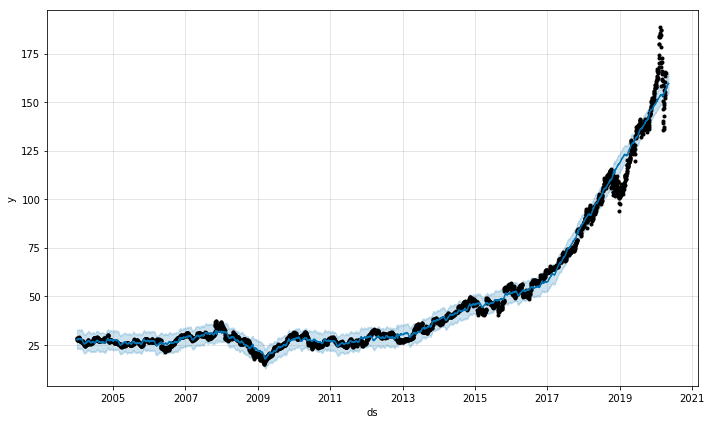

In [11]:
prophet_model.plot(forcast);

If you want to visualize the individual forecast components, we can use Prophet’s built-in plot_components method like below

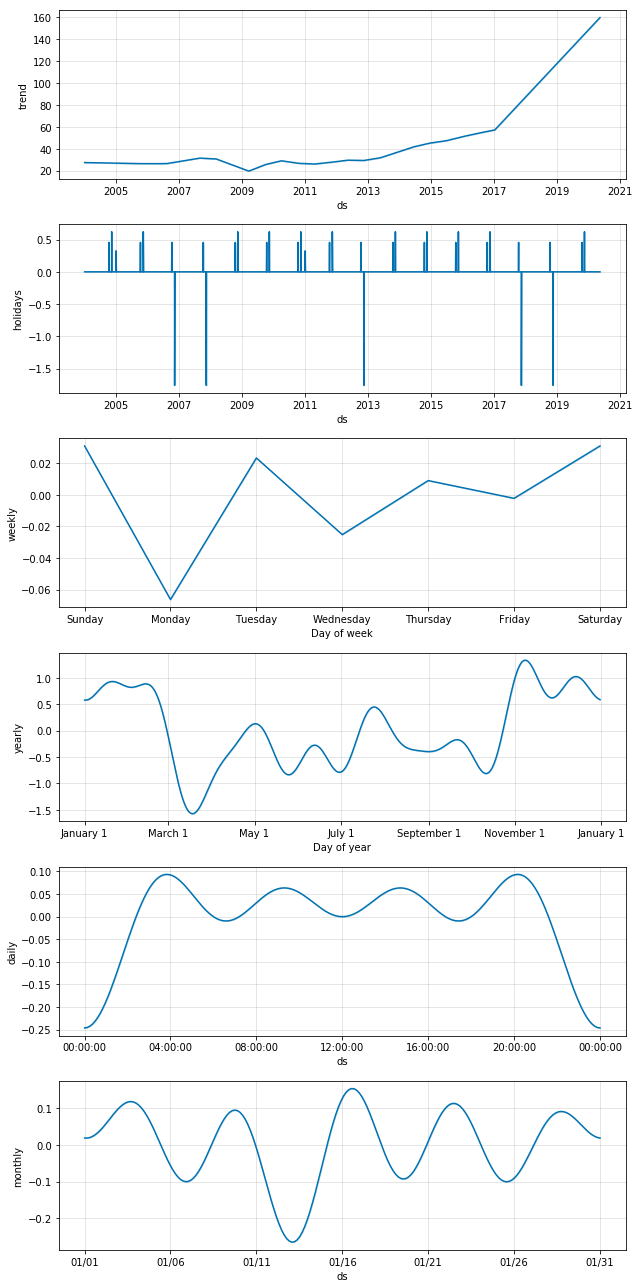

In [12]:
prophet_model.plot_components(forcast);

In [13]:
forcast.shape

(4126, 70)

In [14]:
forcast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4121,2020-05-05,159.388894,154.577817,164.104456
4122,2020-05-06,159.418963,154.460245,164.508000
4123,2020-05-07,159.555340,154.868784,164.144179
4124,2020-05-08,159.600207,154.897858,164.270354
4125,2020-05-09,159.604226,154.635729,164.176796


### Prediction Performance

The performance_metrics utility can be used to compute some useful statistics of the prediction performance (yhat, yhat_lower, and yhat_upper compared to y), as a function of the distance from the cutoff (how far into the future the prediction was). The statistics computed are mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), mean absolute percent error (MAPE), and coverage of the yhat_lower and yhat_upper estimates. 

In [20]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(prophet_model, horizon='180 days')
df_cv.head()

INFO:fbprophet:Making 59 forecasts with cutoffs between 2005-06-27 00:00:00 and 2019-10-12 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-06-28,25.951926,25.443442,26.442892,25.07,2005-06-27
1,2005-06-29,26.007561,25.486591,26.518795,25.09,2005-06-27
2,2005-06-30,26.037497,25.550053,26.525952,24.84,2005-06-27
3,2005-07-01,26.063954,25.567649,26.562839,24.71,2005-06-27
4,2005-07-05,26.008043,25.483113,26.513532,24.98,2005-06-27


In [21]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2005-06-28,25.951926,25.443442,26.442892,25.07,2005-06-27
1,2005-06-29,26.007561,25.486591,26.518795,25.09,2005-06-27
2,2005-06-30,26.037497,25.550053,26.525952,24.84,2005-06-27
3,2005-07-01,26.063954,25.567649,26.562839,24.71,2005-06-27
4,2005-07-05,26.008043,25.483113,26.513532,24.98,2005-06-27
...,...,...,...,...,...,...
7315,2020-04-03,146.862788,142.726948,151.026787,153.83,2019-10-12
7316,2020-04-06,146.976604,143.052274,151.251878,165.27,2019-10-12
7317,2020-04-07,147.173281,143.158246,151.396492,163.49,2019-10-12
7318,2020-04-08,147.301347,143.386797,151.551960,165.13,2019-10-12


In [22]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,19 days,24.145379,4.913795,3.602882,0.080567,0.065829,0.363021
1,20 days,24.548007,4.954595,3.637843,0.081706,0.065298,0.362607
2,21 days,24.915732,4.991566,3.665989,0.082490,0.066569,0.366530
3,22 days,25.032974,5.003296,3.687515,0.083032,0.067543,0.363421
4,23 days,25.120151,5.012001,3.719273,0.084302,0.068299,0.358590


In [23]:
df_p

,horizon,mse,rmse,mae,mape,mdape,coverage
0,19 days,24.145379,4.913795,3.602882,0.080567,0.065829,0.363021
1,20 days,24.548007,4.954595,3.637843,0.081706,0.065298,0.362607
2,21 days,24.915732,4.991566,3.665989,0.082490,0.066569,0.366530
3,22 days,25.032974,5.003296,3.687515,0.083032,0.067543,0.363421
4,23 days,25.120151,5.012001,3.719273,0.084302,0.068299,0.358590
...,...,...,...,...,...,...,...
157,176 days,72.977032,8.542660,6.725170,0.170220,0.131704,0.251041
158,177 days,74.639764,8.639431,6.801220,0.171044,0.133701,0.250385
159,178 days,76.410452,8.741307,6.864420,0.171401,0.135974,0.251751
160,179 days,78.197893,8.842957,6.908080,0.170377,0.137389,0.256997


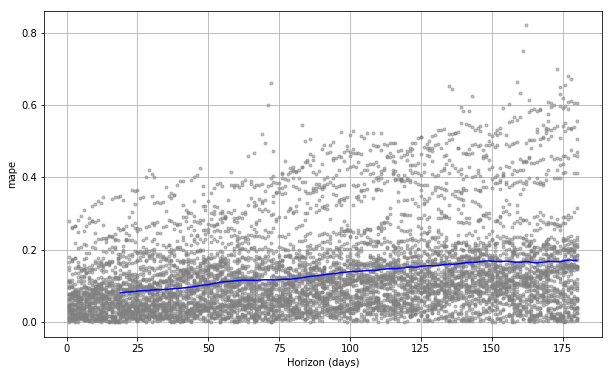

In [24]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

### License
MIT License

Copyright (c) 2020 Nikhil Kohli

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.